## Titanic Data Analysis

In [3]:
#Imprting libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

In [4]:
t=pd.read_csv("DataFiles/train.csv")

In [5]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
t.shape

(891, 12)

In [7]:
t.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
t.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Here, "Name" and "Ticket Number" do not help our analysis, and "Cabin" has more than 80% null values.. hence lets remove those columns

In [9]:
t.drop(["Name","Ticket","Cabin"], inplace=True,axis=1)
t

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [10]:
t.shape

(891, 9)

In [11]:
t.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

### Fill Age with Average Age
#### From above, we can see that, we still have 177 null values in Age columns. We can eirther remove this column or fill with average age of the passengers. To fill average age, lets findout the mean of Age and fill the null value with that..

In [12]:
t["Age"].mean()

29.69911764705882

In [13]:
t["Age"].fillna(30,inplace=True)

In [14]:
t.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

#### Now, we only have 2 null values in "Embarked", but that can be ignored 

In [15]:
t.shape

(891, 9)

In [16]:
t.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

####  Finally we have a cleaned data. There are 889 passengers and 9 features for each passengers. Lets start exporing the data more

### Lets find out how many survived

In [17]:
t.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

#### We can see that 340 people have survived the accident while 549 people died.

### Let's visualise this data using a histogram

Survived
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

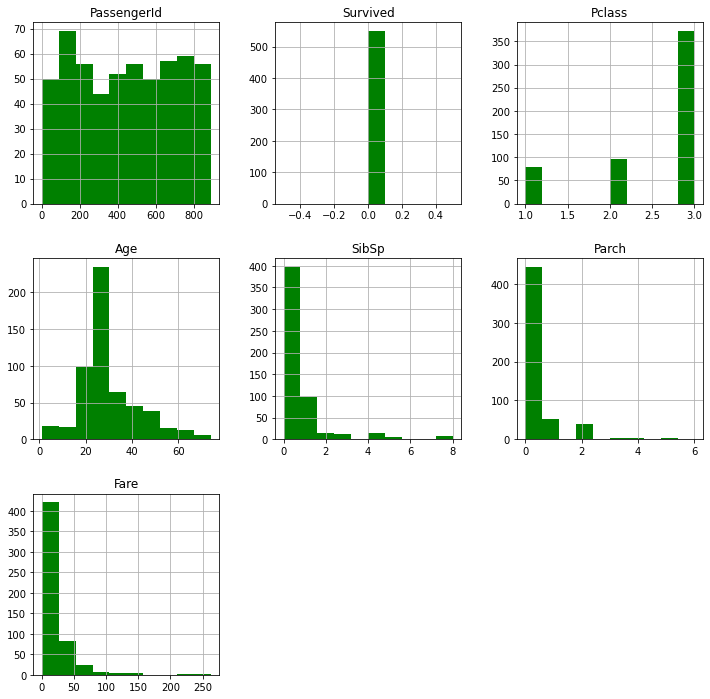

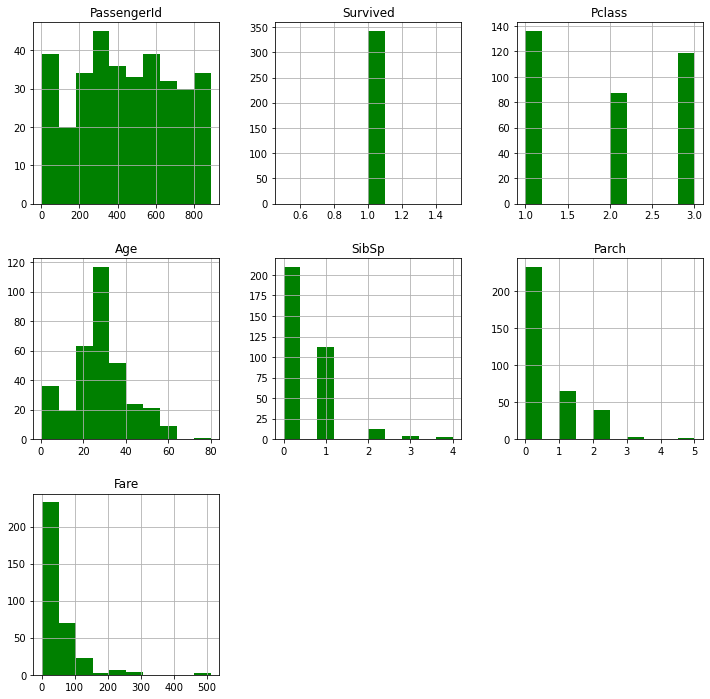

In [18]:
t.groupby('Survived').hist(figsize=(12, 12),color = "green")

### Gender wise summary

In [19]:
genderwise_data = t.groupby('Sex').agg(Total_Passengers=pd.NamedAgg("PassengerId","count"),
                                       Total_Survived = pd.NamedAgg("Survived","sum"),
                                       Average_Age= pd.NamedAgg("Age","mean"),
                                       NumberOfSiblingOrSpouse = pd.NamedAgg("SibSp","sum"),
                                       NumberOfParentsOrChildren =pd.NamedAgg("Parch","sum"))
genderwise_data

,Total_Passengers,Total_Survived,Average_Age,NumberOfSiblingOrSpouse,NumberOfParentsOrChildren
Sex,,,,,
female,314,233,28.267516,218,204
male,577,109,30.570485,248,136


In [20]:
genderwise_data["Survival_Rate"] = genderwise_data["Total_Survived"]/genderwise_data["Total_Passengers"] * 100
genderwise_data

,Total_Passengers,Total_Survived,Average_Age,NumberOfSiblingOrSpouse,NumberOfParentsOrChildren,Survival_Rate
Sex,,,,,,
female,314,233,28.267516,218,204,74.203822
male,577,109,30.570485,248,136,18.890815


### Lets visualise the gender wise data

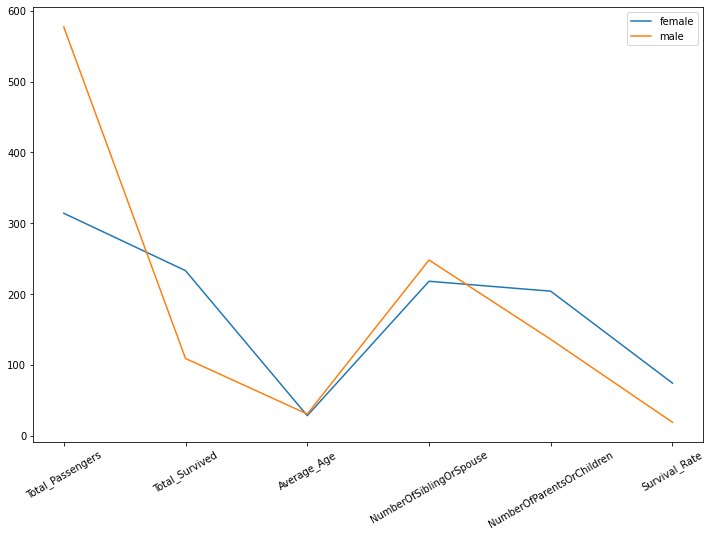

In [21]:
genderwise_data.loc["female"].plot(figsize=(12, 8))
genderwise_data.loc["male"].plot(figsize=(12, 8))
plt.xticks(rotation=30)
plt.legend()
plt.show()

####   When we look into Genderwise data, there are more males boarded than females ( 577 males against 312 females), however, survival rate of females are way higher than that of men. This clearly indicate that, women and childres are given priority during the rescue. Another fact is, if we look at the average age, both men and women comes around 28 and 30. Which shows, Titanic has a very young population of that time.


In [22]:
### ML model

In [23]:
t.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [24]:
X = t[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
Y=t.iloc[:,1]

In [25]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S
887,888,1,female,19.0,0,0,30.0000,S
888,889,3,female,30.0,1,2,23.4500,S
889,890,1,male,26.0,0,0,30.0000,C


In [26]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [27]:
#Encoding categorical data values 
#from sklearn.preprocessing import LabelEncoder
#labelencoder_X = LabelEncoder()
#X["Sex"] = labelencoder_X.fit_transform(X["Sex"])

In [35]:
#Encoding categorical data values 
#from sklearn.preprocessing import LabelEncoder
#labelencoder_X = LabelEncoder()
#X["Embarked"] = labelencoder_X.fit_transform(X["Embarked"])
X=pd.get_dummies(t)

In [29]:
X

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,0,3,30.0,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [32]:
accuracy = classifier.score(X_train,Y_train)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 100%'

In [33]:
Y_pred = classifier.predict(X_test)

In [37]:
data = {"Actual":Y_test,"Predicted":Y_pred}
pd.DataFrame(data)

,Actual,Predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
167,0,0
306,1,1
379,0,0
742,1,1
